In [11]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import rosen
from tqdm import tqdm

In [12]:
dump = np.fromfile("./cases/rosen/dump")
n_org = 1000
n_genes = 4
n_elites = 10
dump = dump.reshape(-1, n_org, n_genes + 1)
print(dump.shape)

(643, 1000, 5)


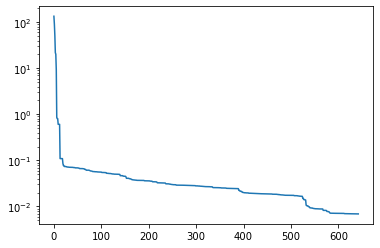

In [13]:
plt.semilogy(-dump[:, 0, -1])

 61%|██████    | 392/643 [01:28<00:56,  4.43it/s]


KeyboardInterrupt: 

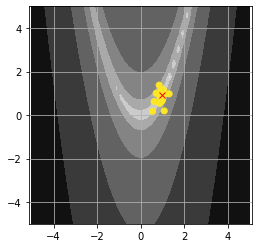

In [14]:
plt.figure(figsize=plt.figaspect(1))

i1, i2 = 0, 1
epoch = 0

x = np.linspace(-5, 5)
x, y = np.meshgrid(x, x)
z = np.log(rosen([x, y]))

plt.contourf(x, y, z, cmap='Greys')

scat = plt.scatter(dump[epoch, ::-1, i1], dump[epoch, ::-1, i2], c=dump[epoch, :, -1], vmax=0)
line_best, = plt.plot(dump[epoch, 0, i1], dump[epoch, 0, i2], 'xr')

plt.axis('equal')


plt.grid()

for epoch in tqdm(range(0, dump.shape[0])):
    scat.set_offsets(dump[epoch, ::-1, [i1, i2]].T)
    scat.set_array(dump[epoch, :, -1])
    line_best.set_data(dump[epoch, 0, i1], dump[epoch, 0, i2])
    plt.savefig("./images/rosen/pairplot_{:04d}.png".format(epoch), dpi=300)

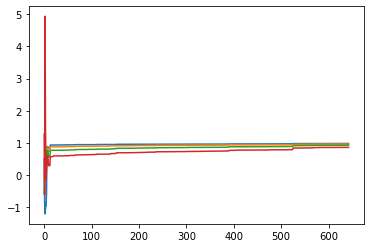

In [15]:
plt.plot(dump[:, 0, :-1])

# Minimize

In [17]:
from scipy.optimize import minimize

In [40]:
dummy = [42]
def f(x, dummy):
    dummy[0] += 1
    return rosen(x)

In [51]:
f(np.array([0, 1]), dummy)
dummy

[53]

In [52]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
dummy = [42]
res = minimize(f, x0, method='Nelder-Mead', tol=1e-6, args=(dummy))
res.x

array([1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028])

In [53]:
dummy

[536]